In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics

## load the data

### action data

In [3]:
# last column in action_filttune is the origin in filttune
action_CST_400 = np.loadtxt('data/action_in_CST_matrix_rand_seed400.csv',delimiter=',')
action_filttune_full_400 = np.loadtxt('data/action_in_filttune_matrix_19_seed400.csv',delimiter=',')

action_CST_500 = np.loadtxt('data/action_in_CST_matrix_rand_seed500.csv',delimiter=',')
action_filttune_full_500 = np.loadtxt('data/action_in_filttune_matrix_19_seed500.csv',delimiter=',')

action_CST_700 = np.loadtxt('data/action_in_CST_matrix_rand_seed700.csv',delimiter=',')
action_filttune_full_700 = np.loadtxt('data/action_in_filttune_matrix_19_seed700.csv',delimiter=',')

action_CST_800 = np.loadtxt('data/action_in_CST_matrix_rand_seed800.csv',delimiter=',')
action_filttune_full_800 = np.loadtxt('data/action_in_filttune_matrix_19_seed800.csv',delimiter=',')

action_CST_900 = np.loadtxt('data/action_in_CST_matrix_rand_seed900.csv',delimiter=',')
action_filttune_full_900 = np.loadtxt('data/action_in_filttune_matrix_19_seed900.csv',delimiter=',')

action_CST_1000 = np.loadtxt('data/action_in_CST_matrix_rand_seed1000.csv',delimiter=',')
action_filttune_full_1000 = np.loadtxt('data/action_in_filttune_matrix_19_seed1000.csv',delimiter=',')

action_CST_1100 = np.loadtxt('data/action_in_CST_matrix_rand_seed1100.csv',delimiter=',')
action_filttune_full_1100 = np.loadtxt('data/action_in_filttune_matrix_19_seed1100.csv',delimiter=',')

action_CST_1200 = np.loadtxt('data/action_in_CST_matrix_rand_seed1200.csv',delimiter=',')
action_filttune_full_1200 = np.loadtxt('data/action_in_filttune_matrix_19_seed1200.csv',delimiter=',')

In [4]:
action_filttune_400 = action_filttune_full_400[:,0:5372]
action_filttune_500 = action_filttune_full_500[:,0:3201]

action_filttune_700 = action_filttune_full_700[:,0:855]
action_filttune_800 = action_filttune_full_800[:,0:482]

action_filttune_900  = action_filttune_full_900[:,0:1083]
action_filttune_1000 = action_filttune_full_1000[:,0:1068]
action_filttune_1100 = action_filttune_full_1100[:,0:2910]
action_filttune_1200 = action_filttune_full_1200[:,0:3878]

### cmp and screw position

In [5]:
SP_500 = np.loadtxt('data/screw_position_CST_matrix_random_500.csv',delimiter=',')
#cmp_full_500 = np.loadtxt('data/cmp_matrix_19_seed500.csv',delimiter=',')

SP_900 = np.loadtxt('data/screw_position_CST_matrix_random_900.csv',delimiter=',')
cmp_full_900 = np.loadtxt('data/cmp_matrix_19_seed900.csv',delimiter=',')

SP_1000 = np.loadtxt('data/screw_position_CST_matrix_random_1000.csv',delimiter=',')
cmp_full_1000 = np.loadtxt('data/cmp_matrix_19_seed1000.csv',delimiter=',')

SP_1100 = np.loadtxt('data/screw_position_CST_matrix_random_1100.csv',delimiter=',')
cmp_full_1100 = np.loadtxt('data/cmp_matrix_19_seed1100.csv',delimiter=',')

In [6]:
cmp_500 = (action_filttune_500.transpose() + action_filttune_full_500[:,3201]).transpose()

cmp_900  = cmp_full_900[:,0:1083]
cmp_1000 = cmp_full_1000[:,0:1068]
cmp_1100 = cmp_full_1100[:,0:2910]

In [7]:
np.count_nonzero(cmp_500) 

60819

In [8]:
cmp_500.shape

(19, 3201)

In [9]:
19*3201

60819

## load the RMSE data

In [5]:
#load the RMSE data.
#1st row: rmse; 2nd row: mrse
RMS_400  = np.loadtxt('data/RMS_seed400.csv',delimiter=',')
RMS_500  = np.loadtxt('data/RMS_seed500.csv',delimiter=',')

RMS_700  = np.loadtxt('data/RMS_seed700.csv',delimiter=',')
RMS_800  = np.loadtxt('data/RMS_seed800.csv',delimiter=',')

RMS_900  = np.loadtxt('data/RMS_seed900.csv',delimiter=',')
RMS_1000 = np.loadtxt('data/RMS_seed1000.csv',delimiter=',')
RMS_1100 = np.loadtxt('data/RMS_seed1100.csv',delimiter=',')
RMS_1200 = np.loadtxt('data/RMS_seed1200.csv',delimiter=',')

## EDA

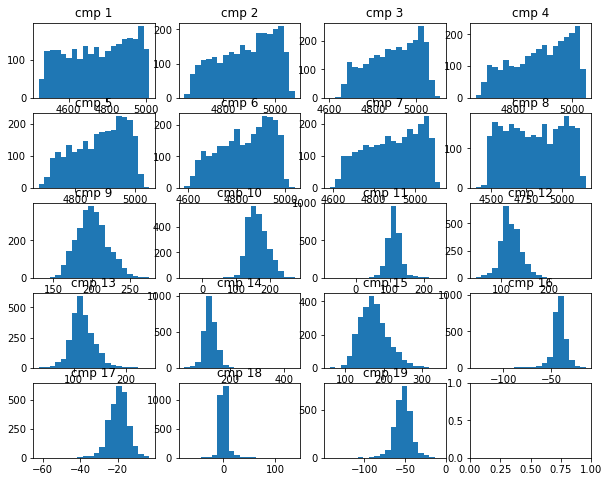

In [16]:
fig, axs = plt.subplots(5, 4, figsize =(10,8))
 
# distribution of screw positions in CST
axs[0, 0].hist(y_train_500.transpose()[0,:],20)
axs[0, 0].set_title('cmp 1')
 
axs[0, 1].hist(y_train_500.transpose()[1,:],20)
axs[0, 1].set_title('cmp 2')
 
axs[0, 2].hist(y_train_500.transpose()[2,:],20)
axs[0, 2].set_title('cmp 3')
 
axs[0, 3].hist(y_train_500.transpose()[3,:],20)
axs[0, 3].set_title('cmp 4')
 
axs[1, 0].hist(y_train_500.transpose()[4,:],20)
axs[1, 0].set_title('cmp 5')
 
axs[1, 1].hist(y_train_500.transpose()[5,:],20)
axs[1, 1].set_title('cmp 6')
 
axs[1, 2].hist(y_train_500.transpose()[6,:],20)
axs[1, 2].set_title('cmp 7')
 
axs[1, 3].hist(y_train_500.transpose()[7,:],20)
axs[1, 3].set_title('cmp 8')
 
axs[2, 0].hist(y_train_500.transpose()[8,:],20)
axs[2, 0].set_title('cmp 9')
 
axs[2, 1].hist(y_train_500.transpose()[9,:],20)
axs[2, 1].set_title('cmp 10')
 
axs[2, 2].hist(y_train_500.transpose()[10,:],20)
axs[2, 2].set_title('cmp 11')
 
axs[2, 3].hist(y_train_500.transpose()[11,:],20)
axs[2, 3].set_title('cmp 12')
 
axs[3, 0].hist(y_train_500.transpose()[12,:],20)
axs[3, 0].set_title('cmp 13')
 
axs[3, 1].hist(y_train_500.transpose()[13,:],20)
axs[3, 1].set_title('cmp 14')
 
axs[3, 2].hist(y_train_500.transpose()[14,:],20)
axs[3, 2].set_title('cmp 15')
 
axs[3, 3].hist(y_train_500.transpose()[15,:],20)
axs[3, 3].set_title('cmp 16')
 
axs[4, 0].hist(y_train_500.transpose()[16,:],20)
axs[4, 0].set_title('cmp 17')
 
axs[4, 1].hist(y_train_500.transpose()[17,:],20)
axs[4, 1].set_title('cmp 18')
 
axs[4, 2].hist(y_train_500.transpose()[18,:],20)
axs[4, 2].set_title('cmp 19')
 
#Show plot
plt.show()

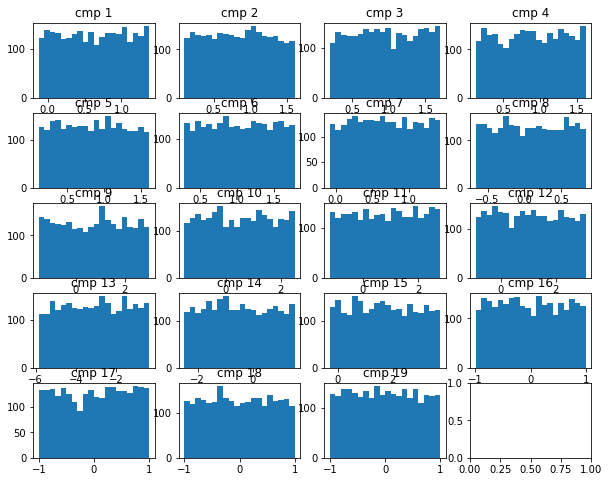

In [17]:
fig, axs = plt.subplots(5, 4, figsize =(10,8))
 
# distribution of screw positions in CST
axs[0, 0].hist(X_train_500.transpose()[0,:],20)
axs[0, 0].set_title('cmp 1')
 
axs[0, 1].hist(X_train_500.transpose()[1,:],20)
axs[0, 1].set_title('cmp 2')
 
axs[0, 2].hist(X_train_500.transpose()[2,:],20)
axs[0, 2].set_title('cmp 3')
 
axs[0, 3].hist(X_train_500.transpose()[3,:],20)
axs[0, 3].set_title('cmp 4')
 
axs[1, 0].hist(X_train_500.transpose()[4,:],20)
axs[1, 0].set_title('cmp 5')
 
axs[1, 1].hist(X_train_500.transpose()[5,:],20)
axs[1, 1].set_title('cmp 6')
 
axs[1, 2].hist(X_train_500.transpose()[6,:],20)
axs[1, 2].set_title('cmp 7')
 
axs[1, 3].hist(X_train_500.transpose()[7,:],20)
axs[1, 3].set_title('cmp 8')
 
axs[2, 0].hist(X_train_500.transpose()[8,:],20)
axs[2, 0].set_title('cmp 9')
 
axs[2, 1].hist(X_train_500.transpose()[9,:],20)
axs[2, 1].set_title('cmp 10')
 
axs[2, 2].hist(X_train_500.transpose()[10,:],20)
axs[2, 2].set_title('cmp 11')
 
axs[2, 3].hist(X_train_500.transpose()[11,:],20)
axs[2, 3].set_title('cmp 12')
 
axs[3, 0].hist(X_train_500.transpose()[12,:],20)
axs[3, 0].set_title('cmp 13')
 
axs[3, 1].hist(X_train_500.transpose()[13,:],20)
axs[3, 1].set_title('cmp 14')
 
axs[3, 2].hist(X_train_500.transpose()[14,:],20)
axs[3, 2].set_title('cmp 15')
 
axs[3, 3].hist(X_train_500.transpose()[15,:],20)
axs[3, 3].set_title('cmp 16')
 
axs[4, 0].hist(X_train_500.transpose()[16,:],20)
axs[4, 0].set_title('cmp 17')
 
axs[4, 1].hist(X_train_500.transpose()[17,:],20)
axs[4, 1].set_title('cmp 18')
 
axs[4, 2].hist(X_train_500.transpose()[18,:],20)
axs[4, 2].set_title('cmp 19')
 
#Show plot
plt.show()

## Seed 500 complete

In [12]:
X_train_500, X_test_500, y_train_500, y_test_500 = train_test_split(SP_500.transpose(), 
                                                                    cmp_500.transpose(), random_state=1,train_size = 0.8)

#### build the model and train

In [ ]:
'activation': 'relu',
 'alpha': 0.05,
 'batch_size': 'auto',
 'hidden_layer_sizes': (300, 300, 300),
 'learning_rate': 'adaptive',
 'solver': 'adam'

In [82]:
from tensorflow.keras.models import Sequential,load_model, clone_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization, Dropout
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2, l1, l1_l2

from livelossplot import PlotLossesKeras

2021-09-16 19:31:53.156336: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.11.0
2021-09-16 19:31:53.874600: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libnvinfer.so.7
2021-09-16 19:31:53.875850: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libnvinfer_plugin.so.7


##### so far the best

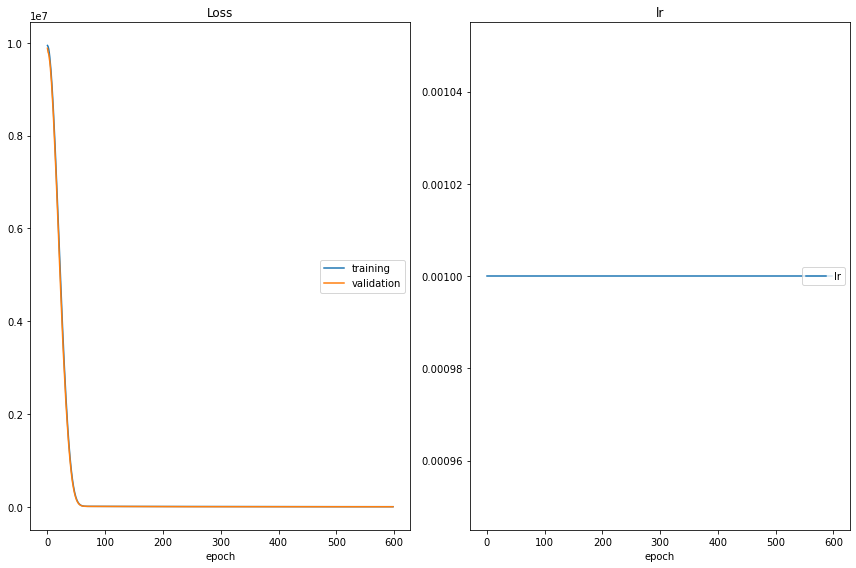

Loss
	training         	 (min: 3325.084, max: 9942202.625, cur: 3354.789)
	validation       	 (min: 2612.792, max: 9882145.332, cur: 2618.971)
lr
	lr               	 (min:    0.001, max:    0.001, cur:    0.001)
2560/2560 [==============================] - 0s 192us/sample - loss: 3354.7888 - val_loss: 2618.9709
Epoch 600/50000
1640/2560 [==================>...........] - ETA: 0s - loss: 3290.5225

In [ ]:
input_shape = (19,)

model_abs_500 = Sequential()
model_abs_500.add(Dense(300, input_shape=input_shape, activation='relu', kernel_regularizer=regularizers.l2(0.05)))
model_abs_500.add(Dropout(0.2))
model_abs_500.add(BatchNormalization())
model_abs_500.add(Dense(300, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model_abs_500.add(Dropout(0.2))
model_abs_500.add(BatchNormalization())
model_abs_500.add(Dense(300, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model_abs_500.add(Dropout(0.2))
model_abs_500.add(BatchNormalization())
model_abs_500.add(Dense(19, activation='linear', kernel_regularizer=regularizers.l2(0.1)))

# Configure the model and start training
model_abs_500.compile(loss='mse', optimizer='adam')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=20, min_lr=0.0001)
tbCallback = TensorBoard(log_dir='./logs')
filepath = "model_abs/model_500_0.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint, reduce_lr, PlotLossesKeras()]

model_abs_500.fit(X_train_500, y_train_500, epochs=50000, batch_size = 40, verbose=1, validation_data = (X_test_500,y_test_500), #validation_split=0.2,
            callbacks=callbacks_list)

### retrain a model-1

In [25]:
# load so-far-the-best
model_2_retrain_1 = load_model('model/model_500_2.h5')

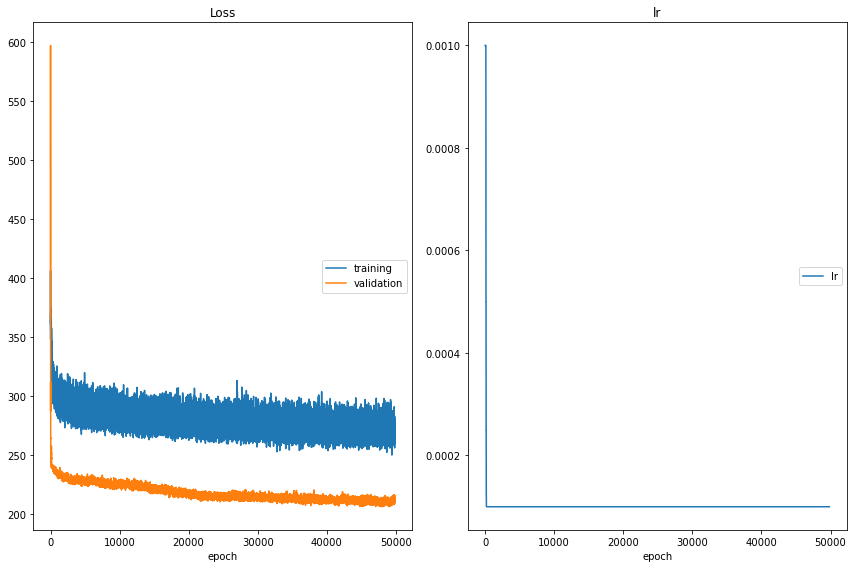

Loss
	training         	 (min:  249.965, max:  406.026, cur:  279.567)
	validation       	 (min:  206.187, max:  596.939, cur:  212.254)
lr
	lr               	 (min:    0.000, max:    0.001, cur:    0.000)
2560/2560 [==============================] - 1s 198us/sample - loss: 279.5672 - val_loss: 212.2535
Epoch 49835/50000
 200/2560 [=>............................] - ETA: 0s - loss: 273.1288
Epoch 49835: val_loss did not improve from 206.18653


In [ ]:
# Configure the model and start retraining
model_2_retrain_1.compile(loss='mse', optimizer='adam')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=20, min_lr=0.0001)
tbCallback = TensorBoard(log_dir='./logs')
filepath = "model/model_500_2_retrain_1.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint, reduce_lr, PlotLossesKeras()]

model_2_retrain_1.fit(X_train_500, y_train_500, epochs=50000, batch_size = 200, verbose=1, validation_data = (X_test_500,y_test_500), #validation_split=0.2,
            callbacks=callbacks_list)

### retrain a model-2

In [77]:
# load so-far-the-best
model_2_retrain_2_temp = load_model('model/model_500_2_retrain_1.h5')

In [78]:
# change the dropout rate and regularizer
model_2_retrain_2_temp.get_layer('dense').kernel_regularizer = l2(0.1)
model_2_retrain_2_temp.get_layer('dense').activity_regularizer = l1(0.001)
model_2_retrain_2_temp.layers[1].rate = 0.3

model_2_retrain_2_temp.get_layer('dense_1').kernel_regularizer = l2(0.2)
model_2_retrain_2_temp.get_layer('dense_1').activity_regularizer = l1(0.01)
model_2_retrain_2_temp.layers[4].rate = 0.3

model_2_retrain_2_temp.get_layer('dense_2').kernel_regularizer = l2(0.2)
model_2_retrain_2_temp.get_layer('dense_2').activity_regularizer = l1(0.01)
model_2_retrain_2_temp.layers[4].rate = 0.3

In [81]:
model_2_retrain_2 = clone_model(model_2_retrain_2_temp)

In [82]:
model_2_retrain_2.compile(loss='mse', optimizer='adam')

In [83]:
model_2_retrain_2.load_weights('model/model_500_2_retrain_1.h5')

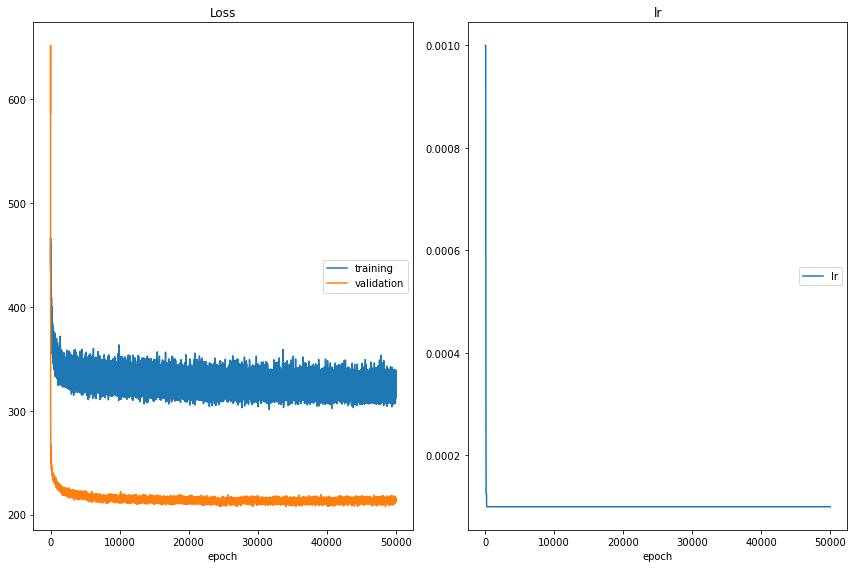

Loss
	training         	 (min:  301.137, max:  466.238, cur:  314.352)
	validation       	 (min:  207.599, max:  651.516, cur:  213.169)
lr
	lr               	 (min:    0.000, max:    0.001, cur:    0.000)
2560/2560 [==============================] - 0s 167us/sample - loss: 314.3522 - val_loss: 213.1690


In [84]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=20, min_lr=0.0001)
tbCallback = TensorBoard(log_dir='./logs')
filepath = "model/model_500_2_retrain_2.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint, reduce_lr, PlotLossesKeras()]

model_2_retrain_2.fit(X_train_500, y_train_500, epochs=50000, batch_size = 200, verbose=1, validation_data = (X_test_500,y_test_500), #validation_split=0.2,
            callbacks=callbacks_list)

In [75]:
model_2_retrain_2_temp.layers[6].name

'dense_2'

### retrain a model-3 & 4

In [134]:
# load so-far-the-best
model_2_retrain_3_temp = load_model('model/model_500_2_retrain_2.h5')

In [135]:
# change the dropout rate and regularizer
model_2_retrain_3_temp.get_layer('dense').kernel_regularizer = l1_l2(0.1,0.1)
model_2_retrain_3_temp.layers[1].rate = 0.4

model_2_retrain_3_temp.get_layer('dense_1').kernel_regularizer = l1_l2(0.1,0.1)
model_2_retrain_3_temp.layers[4].rate = 0.4

model_2_retrain_3_temp.get_layer('dense_2').kernel_regularizer = l1_l2(0.1,0.1)
model_2_retrain_3_temp.layers[4].rate = 0.4

In [136]:
model_2_retrain_3 = clone_model(model_2_retrain_3_temp)

In [137]:
model_2_retrain_3.compile(loss='mse', optimizer='adam')

In [138]:
model_2_retrain_3.load_weights('model/model_500_2_retrain_2.h5')

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8,
                              patience=40, min_lr=0.00001)
tbCallback = TensorBoard(log_dir='./logs')
filepath = "model/model_500_2_retrain_3.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint, reduce_lr, PlotLossesKeras()]

model_2_retrain_3.fit(X_train_500, y_train_500, epochs=150000, batch_size = 200, verbose=1, validation_data = (X_test_500,y_test_500), #validation_split=0.2,
            callbacks=callbacks_list)

KeyboardInterrupt: 

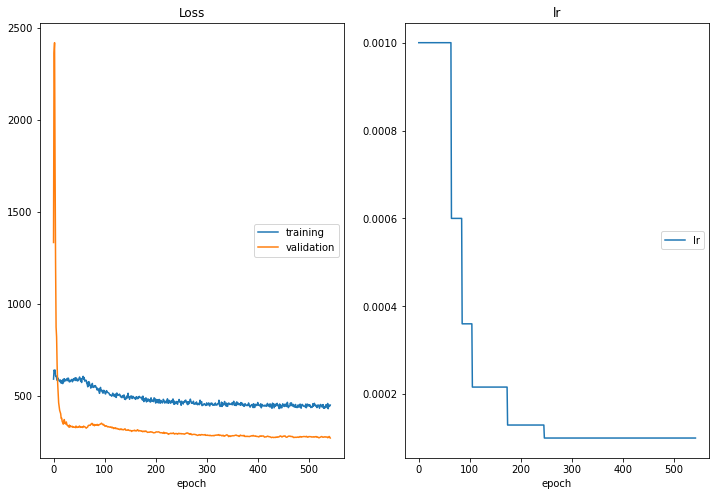

In [133]:
model_2_retrain_4 = load_model('model/model_500_2_retrain_3.h5')
model_2_retrain_4.compile(loss='mse', optimizer='adam')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.6,
                              patience=20, min_lr=0.0001)
tbCallback = TensorBoard(log_dir='./logs')
filepath = "model/model_500_2_retrain_4.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint, reduce_lr, PlotLossesKeras()]

model_2_retrain_4.fit(X_train_500, y_train_500, epochs=50000, batch_size = 200, verbose=1, validation_data = (X_test_500,y_test_500), #validation_split=0.2,
            callbacks=callbacks_list)

#### normalize the targets

In [218]:
from sklearn.preprocessing import MinMaxScaler

target_scaler = MinMaxScaler()
target_scaler.fit(y_train_500)

X_train_500_minmax = 10*target_scaler.transform(X_train_500)
X_test_500_minmmax = 10*target_scaler.transform(X_test_500)

y_train_500_minmax = 10*target_scaler.transform(y_train_500)
y_test_500_minmax = 10*target_scaler.transform(y_test_500)

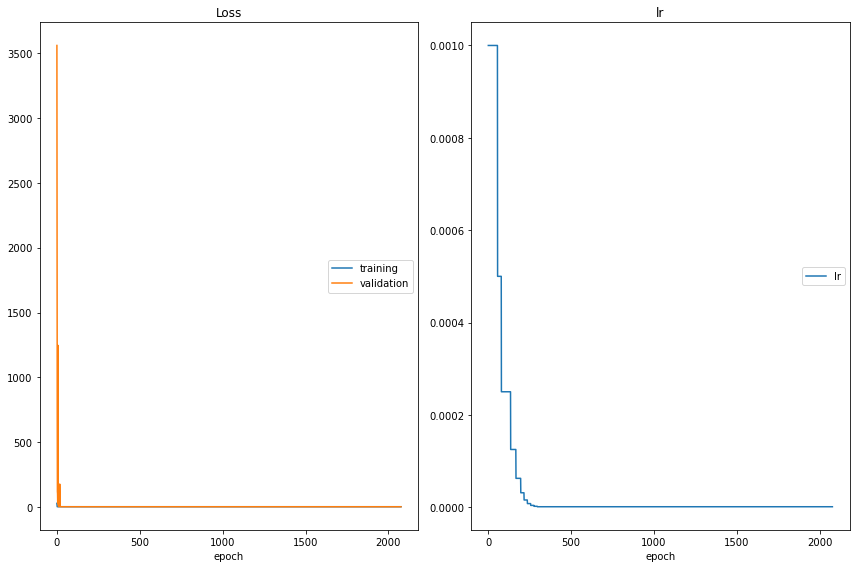

Loss
	training         	 (min:    3.100, max:   29.132, cur:    3.101)
	validation       	 (min:    3.069, max: 3558.400, cur:    3.071)
lr
	lr               	 (min:    0.000, max:    0.001, cur:    0.000)
2560/2560 [==============================] - 2s 856us/sample - loss: 3.1006 - val_loss: 3.0713
Epoch 2078/50000
1764/2560 [===================>..........] - ETA: 0s - loss: 3.0918

In [ ]:
input_shape = (19,)

model_minmax.add(Dense(400, input_shape=input_shape, activation='relu'))
#model_minmax.add(Dropout(0.02))
model_minmax.add(BatchNormalization())
model_minmax.add(Dense(400, activation='relu'))
#model_minmax.add(Dropout(0.02))
model_minmax.add(BatchNormalization())
model_minmax.add(Dense(400, activation='relu'))
#model_minmax.add(Dropout(0.02))
model_minmax.add(BatchNormalization())
model_minmax.add(Dense(19, activation='linear'))

# Configure the model and start training
model_minmax.compile(loss='mse', optimizer='adam')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=20, min_lr=0.000001)
tbCallback = TensorBoard(log_dir='./logs')
filepath = "model/model_500_minmax_0.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint, reduce_lr, PlotLossesKeras()]

model_minmax.fit(X_train_500_minmax, y_train_500_minmax, epochs=50000, batch_size = 36, verbose=1, validation_data = (X_test_500_minmmax,y_test_500_minmax), #validation_split=0.2,
            callbacks=callbacks_list)

#### MSE and R2 score for minmax

In [203]:
y_train_predict_500 = model_minmax.predict(X_train_500_minmax)
y_test_predict_500 = model_minmax.predict(X_test_500_minmmax)

In [204]:
mse_train_500 = metrics.mean_squared_error(y_train_500_minmax, y_train_predict_500)
mse_test_500 = metrics.mean_squared_error(y_test_500_minmax, y_test_predict_500)

r2_train_500 = r2_score(y_train_500_minmax, y_train_predict_500)
r2_test_500 = r2_score(y_test_500_minmax, y_test_predict_500)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE train is {}'.format(mse_train_500))
print('MSE test is {}'.format(mse_test_500))
print('R2 train is {}'.format(r2_train_500))
print('R2 test is {}'.format(r2_test_500))

The model performance for testing set
--------------------------------------
MSE train is 0.031003251512883974
MSE test is 0.030715263974686848
R2 train is -0.000152967329086154
R2 test is -0.003006113271485355


In [199]:
y_train_predict_500_inv = target_scaler.inverse_transform(y_train_predict_500)
y_test_predict_500_inv = target_scaler.inverse_transform(y_test_predict_500)

In [200]:
mse_train_500 = metrics.mean_squared_error(y_train_500, y_train_predict_500_inv)
mse_test_500 = metrics.mean_squared_error(y_test_500, y_test_predict_500_inv)

r2_train_500 = r2_score(y_train_500, y_train_predict_500_inv)
r2_test_500 = r2_score(y_test_500, y_test_predict_500_inv)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE train is {}'.format(mse_train_500))
print('MSE test is {}'.format(mse_test_500))
print('R2 train is {}'.format(r2_train_500))
print('R2 test is {}'.format(r2_test_500))

The model performance for testing set
--------------------------------------
MSE train is 7430.018798331819
MSE test is 7310.410099662353
R2 train is -0.0006605805039751348
R2 test is -0.0031904826334089365


#### MSE and R2 score

In [90]:
y_train_predict_500 = model.predict(X_train_500)
y_test_predict_500 = model.predict(X_test_500)

In [91]:
mse_train_500 = metrics.mean_squared_error(y_train_500, y_train_predict_500)
mse_test_500 = metrics.mean_squared_error(y_test_500, y_test_predict_500)

r2_train_500 = r2_score(y_train_500, y_train_predict_500)
r2_test_500 = r2_score(y_test_500, y_test_predict_500)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE train is {}'.format(mse_train_500))
print('MSE test is {}'.format(mse_test_500))
print('R2 train is {}'.format(r2_train_500))
print('R2 test is {}'.format(r2_test_500))

The model performance for testing set
--------------------------------------
MSE train is 208.50736009099893
MSE test is 258.06542823060107
R2 train is 0.6190423084808787
R2 test is 0.6067981538298751


## Complete_small dataset

### Select the data with RMSE<0.09

In [9]:
index_500 = range(action_CST_500.shape[1])
temp_500 = RMS_500[0,:]>0.09
to_delete_500 = index_500*temp_500
to_delete_500 = [i for i in to_delete_500 if i != 0]

index_900 = range(action_CST_900.shape[1])
temp_900 = RMS_900[0,:]>0.09
to_delete_900 = index_900*temp_900
to_delete_900 = [i for i in to_delete_900 if i != 0]

index_1000 = range(action_CST_1000.shape[1])
temp_1000 = RMS_1000[0,:]>0.09
to_delete_1000 = index_1000*temp_1000
to_delete_1000 = [i for i in to_delete_1000 if i != 0]

index_1100 = range(action_CST_1100.shape[1])
temp_1100 = RMS_1100[0,:]>0.09
to_delete_1100 = index_1100*temp_1100
to_delete_1100 = [i for i in to_delete_1100 if i != 0]

In [10]:
action_CST_500_small  = np.delete(action_CST_500, to_delete_500,  axis=1)
action_CST_900_small  = np.delete(action_CST_900, to_delete_900,  axis=1)
action_CST_1000_small = np.delete(action_CST_1000, to_delete_1000,  axis=1)
action_CST_1100_small = np.delete(action_CST_1100, to_delete_1100,  axis=1)

action_filttune_500_small   = np.delete(action_filttune_500, to_delete_500,  axis=1)
action_filttune_900_small   = np.delete(action_filttune_900, to_delete_900,  axis=1)
action_filttune_1000_small  = np.delete(action_filttune_1000, to_delete_1000,  axis=1)
action_filttune_1100_small  = np.delete(action_filttune_1100, to_delete_1100,  axis=1)

In [12]:
a_CST_small = np.concatenate((action_CST_500_small,action_CST_900_small,
                              action_CST_1000_small,action_CST_1100_small),axis = 1)
a_filttune_small = np.concatenate((action_filttune_500_small,action_filttune_900_small, 
                                   action_filttune_1000_small, action_filttune_1100_small),axis = 1)

In [13]:
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split( 
    a_CST_small.transpose(), a_filttune_small.transpose(), random_state=1,train_size = 0.8)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization, Dropout
import numpy as np
from keras.optimizers import adam

#import tensorflow_addons as tfa

# Set the input shape
input_shape = (19,)
print(f'Feature shape: {input_shape}')

# Create the model
model = Sequential()
model.add(Dense(100, input_shape=input_shape, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
#model.add(Dropout(0.1))
#model.add(BatchNormalization())
model.add(Dense(100, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
#model.add(Dropout(0.1))
#model.add(BatchNormalization())
model.add(Dense(100, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
#model.add(Dropout(0.1))
#model.add(BatchNormalization())
model.add(Dense(19, activation='linear', kernel_regularizer=keras.regularizers.l2(0.001)))

# Configure the model and start training
optimizer = adam(lr=0.01)
model.compile(loss='mse', optimizer=optimizer)
model.fit(X_train_small, y_train_small, epochs=50000, batch_size = 200, verbose=1, validation_split=0.2)

Feature shape: (19,)
Train on 3881 samples, validate on 971 samples
Epoch 1/50000
3881/3881 [==============================] - 0s 50us/step - loss: 7338.8869 - val_loss: 7238.8278
Epoch 2/50000
3881/3881 [==============================] - 0s 16us/step - loss: 7107.1893 - val_loss: 6958.5865
Epoch 3/50000
3881/3881 [==============================] - 0s 15us/step - loss: 6811.4809 - val_loss: 6805.3252
Epoch 4/50000
3881/3881 [==============================] - 0s 16us/step - loss: 6620.1499 - val_loss: 6859.2579
Epoch 5/50000
3881/3881 [==============================] - 0s 17us/step - loss: 6474.9230 - val_loss: 6734.0378
Epoch 6/50000
3881/3881 [==============================] - 0s 15us/step - loss: 6380.2860 - val_loss: 6662.9000
Epoch 7/50000
3881/3881 [==============================] - 0s 16us/step - loss: 6272.5475 - val_loss: 6603.9588
Epoch 8/50000
3881/3881 [==============================] - 0s 15us/step - loss: 6189.8110 - val_loss: 6609.9991
Epoch 9/50000
3881/3881 [===========